## **Step 1: Setting up the database**


In [1]:
import sqlite3

# Create or connect to an SQLite database
connection = sqlite3.connect('student_grades.db')

# Check if the connection was successful
print("Database created and connected!")

# Create a cursor object
cursor = connection.cursor()

# Explanation
print("Cursor created!")

Database created and connected!
Cursor created!


## **Step 2: Create Tables**

In [2]:
# Create the sales table
cursor.execute('''
CREATE TABLE IF NOT EXISTS students (
    student_id INTEGER PRIMARY KEY AUTOINCREMENT,
    first_name TEXT NOT NULL,
    last_name TEXT NOT NULL
)
''')

cursor.execute('''
CREATE TABLE IF NOT EXISTS grades (
    grade_id INTEGER PRIMARY KEY AUTOINCREMENT,
    student_id INTEGER,
    subject TEXT NOT NULL,
    grade INTEGER,
    FOREIGN KEY (student_id) REFERENCES students (id)
)
''')

print("Tables created!")

Tables created!


In [6]:
#uncomment to drop the tables
#cursor.execute("DROP TABLE IF EXISTS grades")
#cursor.execute("DROP TABLE IF EXISTS students")
#print("Table has been dropped.")
#connection.commit()

## **Step 3: Insert Data**

In [3]:
# Sample data to insert into the students table
students_data = [
    (1,'Alice','Johnson'),
    (2,'Bob','Smith'),
    (3,'Carol','White'),
    (4,'David','Brown'),
    (5,'Eve','Davis')
]

# Insert data into the table
cursor.executemany('''
INSERT INTO students (student_id, first_name, last_name) VALUES (?, ?, ?)
''', students_data)

# Commit the transaction
connection.commit()

print("Data inserted into the students table!")

Data inserted into the students table!


In [4]:
# Sample data for the grades table
grades_data = [
    (1,1,'Math',95),
    (2,1,'English',88),
    (3,1,'History',90),
    (4,2,'Math',82),
    (5,2,'English',76),
    (6,2,'History',85),
    (7,3,'Math',50),
    (8,3,'English',40),
    (9,3,'History',40),
    (10,4,'Math',81),
    (11,4,'English',88),
    (12,4,'History',100),
    (13,5,'Math',100),
    (14,5,'English',100),
    (15,5,'History',98),
]

# Insert data into the grades table
cursor.executemany('''
INSERT INTO grades (grade_id, student_id, subject, grade) VALUES (?, ?, ?, ?)
''', grades_data)

# Commit the transaction
connection.commit()

print("Data inserted into the grades table!")


Data inserted into the grades table!


## **Perform SQL Queries**

In [5]:
# Retrieve all students' names and their grades.
cursor.execute('''
SELECT students.first_name, students.last_name, grades.grade, grades.subject
FROM students
JOIN grades ON grades.student_id = students.student_id
''')
rows = cursor.fetchall()
print("All students and grades:")
for row in rows:
    print(row)

# Find the average grade for each student.
cursor.execute('''
SELECT students.first_name, students.last_name, AVG(grades.grade)
FROM students
JOIN grades ON grades.student_id = students.student_id
GROUP BY grades.student_id
''')
rows = cursor.fetchall()
print("Average grades:")
for row in rows:
    print(row)

# Find the student with the highest average grade.
cursor.execute('''
SELECT students.first_name, students.last_name, AVG(grades.grade) AS avg
FROM students
JOIN grades ON grades.student_id = students.student_id
GROUP BY grades.student_id
ORDER BY avg DESC LIMIT 1
''')
rows = cursor.fetchall()
print("Highest average:")
for row in rows:
    print(row)

# Find the average grade for the Math subject.
cursor.execute('''
SELECT grades.subject, AVG(grades.grade) AS avg
FROM grades
WHERE grades.subject == 'Math'
GROUP BY grades.subject
''')
rows = cursor.fetchall()
print("Math average:")
for row in rows:
    print(row)

# List all students who scored above 90 in any subject
cursor.execute('''
SELECT students.first_name, students.last_name, grades.grade, grades.subject
FROM students
JOIN grades ON grades.student_id = students.student_id
WHERE grades.grade > 90
''')
rows = cursor.fetchall()
print("All students and grades strictly above 90:")
for row in rows:
    print(row)

All students and grades:
('Alice', 'Johnson', 95, 'Math')
('Alice', 'Johnson', 88, 'English')
('Alice', 'Johnson', 90, 'History')
('Bob', 'Smith', 82, 'Math')
('Bob', 'Smith', 76, 'English')
('Bob', 'Smith', 85, 'History')
('Carol', 'White', 50, 'Math')
('Carol', 'White', 40, 'English')
('Carol', 'White', 40, 'History')
('David', 'Brown', 81, 'Math')
('David', 'Brown', 88, 'English')
('David', 'Brown', 100, 'History')
('Eve', 'Davis', 100, 'Math')
('Eve', 'Davis', 100, 'English')
('Eve', 'Davis', 98, 'History')
Average grades:
('Alice', 'Johnson', 91.0)
('Bob', 'Smith', 81.0)
('Carol', 'White', 43.333333333333336)
('David', 'Brown', 89.66666666666667)
('Eve', 'Davis', 99.33333333333333)
Highest average:
('Eve', 'Davis', 99.33333333333333)
Math average:
('Math', 81.6)
All students and grades strictly above 90:
('Alice', 'Johnson', 95, 'Math')
('David', 'Brown', 100, 'History')
('Eve', 'Davis', 100, 'Math')
('Eve', 'Davis', 100, 'English')
('Eve', 'Davis', 98, 'History')


## **Step 5: Load Data into Pandas**

In [7]:
import pandas as pd

student_dataframe=pd.read_sql_query('SELECT * FROM students',connection)
grade_dataframe=pd.read_sql_query('SELECT * FROM grades',connection)
joined_dataframe=pd.read_sql_query('''
SELECT students.first_name, students.last_name, grades.grade, grades.subject
FROM students
JOIN grades ON grades.student_id = students.student_id
''',connection)
joined_dataframe.head()

,first_name,last_name,grade,subject
0,Alice,Johnson,95,Math
1,Alice,Johnson,88,English
2,Alice,Johnson,90,History
3,Bob,Smith,82,Math
4,Bob,Smith,76,English


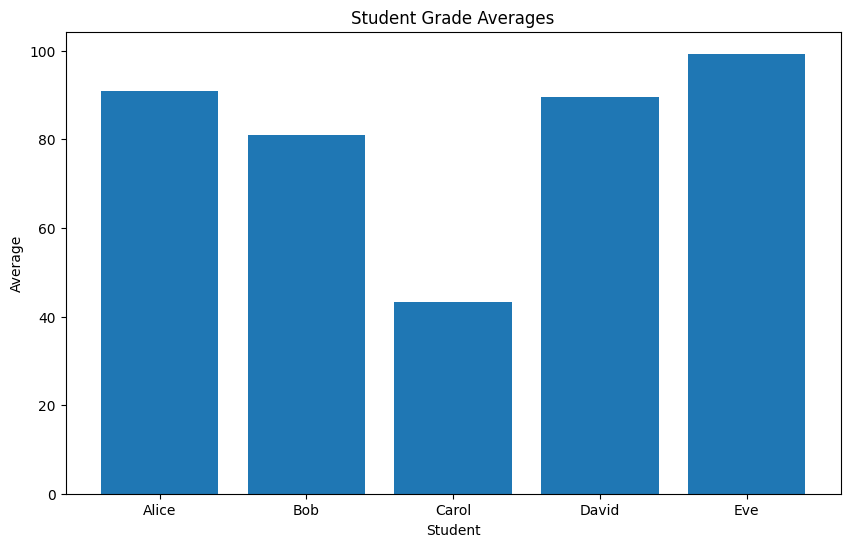

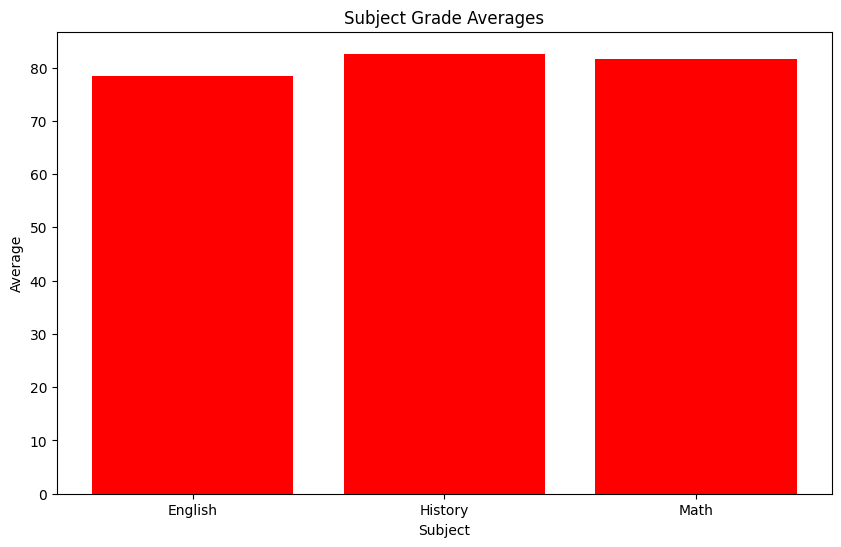

In [8]:
import matplotlib.pyplot as plt

avg_dataframe=pd.read_sql_query('''
SELECT students.first_name, students.last_name, AVG(grades.grade) AS avg
FROM students
JOIN grades ON grades.student_id = students.student_id
GROUP BY grades.student_id
''',connection)

avg_dataframe_sub=pd.read_sql_query('''
SELECT grades.subject, AVG(grades.grade) AS avg
FROM grades
GROUP BY grades.subject
''',connection)

plt.figure(figsize=(10,6))
plt.bar(avg_dataframe['first_name'],avg_dataframe['avg'])
plt.xlabel('Student')
plt.ylabel('Average')
plt.title('Student Grade Averages')
plt.show()

plt.figure(figsize=(10,6))
plt.bar(avg_dataframe_sub['subject'],avg_dataframe_sub['avg'],color='red')
plt.xlabel('Subject')
plt.ylabel('Average')
plt.title('Subject Grade Averages')
plt.show()

## **Bonus**

Highest average:
('Eve', 'Davis', 'English', 100)
('David', 'Brown', 'History', 100)
('Eve', 'Davis', 'Math', 100)


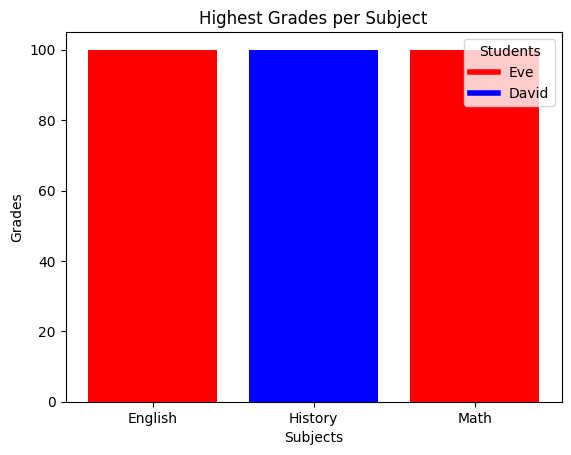

In [17]:
cursor.execute('''
SELECT students.first_name, students.last_name, grades.subject, MAX(grades.grade)
FROM students
JOIN grades ON grades.student_id = students.student_id
GROUP BY grades.subject
''')
rows = cursor.fetchall()
print("Highest average:")
for row in rows:
    print(row)

students = [row[0] for row in rows]
subjects = [row[2] for row in rows]
grades = [row[3] for row in rows]
unique_students = list(set(students))
colors=["red","blue"]

fig, ax = plt.subplots()
ax.bar(subjects[0],grades[0],color=colors[0],label=students[0])
ax.bar(subjects[1],grades[1],color=colors[1],label=students[1])
ax.bar(subjects[2],grades[2],color=colors[0],label=students[2])
ax.set_xlabel('Subjects')
ax.set_ylabel('Grades')
ax.set_title('Highest Grades per Subject')
handles=[plt.Line2D([0],[0],color=colors[0],lw=4),plt.Line2D([0],[0],color=colors[1],lw=4)]
ax.legend(handles,unique_students[::-1],title="Students")

# Display the plot
plt.show()